In [5]:
import numpy as np
import pandas as pd
import os 
import torch 

from typing import List, Tuple, Dict, Any

In [6]:
df = pd.read_pickle('dataset/word_embeddings_dataframe.pkl')

In [7]:
def modify_image_path(image_path: str) -> str: 
    filename: str = os.path.basename(image_path).split('floorplan_image\\')[1] 
    new_path: str = os.path.join('human_annotated_images', filename) 
    return new_path

df['Modified_Image_Path'] = df['Image_Path'].apply(modify_image_path)
df.head()

,File_Name,Text,Image_Path,BERT_Embeddings,Modified_Image_Path
0,10017,"The balcony juts out on the south side, with t...",../floorplan_image\10017.png,"[[-0.6216691, -0.029034398, 0.045137372, -0.09...",human_annotated_images/10017.png
1,10042,The balcony is in the southeastern corner of t...,../floorplan_image\10042.png,"[[-0.6944888, 0.015425202, -0.0041255075, -0.1...",human_annotated_images/10042.png
2,10045,"bathroom is in north side of the house, next t...",../floorplan_image\10045.png,"[[-0.6030773, -0.0011889015, 0.045667697, -0.1...",human_annotated_images/10045.png
3,10047,"The balcony is in the north east corner, just ...",../floorplan_image\10047.png,"[[-0.69215715, -0.052971497, 0.03891414, -0.02...",human_annotated_images/10047.png
4,10052,The balcony is on the southwest side of the ap...,../floorplan_image\10052.png,"[[-0.61126614, -0.005761562, -0.054692637, 0.0...",human_annotated_images/10052.png


In [7]:
print(df['Text'][0])

The balcony juts out on the south side, with the master to the north. It is approximately 12 feet wide by 5 feet deep, for a total square footage of 60. The bathroom is in the northeast corner with the common room to the south and the living room to the west. It is approximately 12 feet wide by 5 feet deep, for a total square footage of 60. The common room is on the east side with the bathroom to the north, the master room to the south and the living room to the west. Half of the south wall is exterior. It is approximately 12 feet wide by 10 feet deep, for a total square footage of 120. The kitchen is in the southwest corner with the living room to the north and the master room to the east. It is approximately 10 feet wide by 10 feet deep, for a total square footage of 100. The living room is at the northwest corner, with the bathroom and common room to the east, the master room inset at the south west corner, and the kitchen to the south. It is approximately 15 feet wide by 30 feet de

In [8]:
for i in range(5):
    print(df['Text'][i])
    print()

The balcony juts out on the south side, with the master to the north. It is approximately 12 feet wide by 5 feet deep, for a total square footage of 60. The bathroom is in the northeast corner with the common room to the south and the living room to the west. It is approximately 12 feet wide by 5 feet deep, for a total square footage of 60. The common room is on the east side with the bathroom to the north, the master room to the south and the living room to the west. Half of the south wall is exterior. It is approximately 12 feet wide by 10 feet deep, for a total square footage of 120. The kitchen is in the southwest corner with the living room to the north and the master room to the east. It is approximately 10 feet wide by 10 feet deep, for a total square footage of 100. The living room is at the northwest corner, with the bathroom and common room to the east, the master room inset at the south west corner, and the kitchen to the south. It is approximately 15 feet wide by 30 feet de

In [8]:
df.drop(columns=['Image_Path'], inplace=True, axis=1) 

In [9]:
df.rename(columns={'Modified_Image_Path': 'Image_Path'}, inplace=True)
df.head()

,File_Name,Text,BERT_Embeddings,Image_Path
0,10017,"The balcony juts out on the south side, with t...","[[-0.6216691, -0.029034398, 0.045137372, -0.09...",human_annotated_images/10017.png
1,10042,The balcony is in the southeastern corner of t...,"[[-0.6944888, 0.015425202, -0.0041255075, -0.1...",human_annotated_images/10042.png
2,10045,"bathroom is in north side of the house, next t...","[[-0.6030773, -0.0011889015, 0.045667697, -0.1...",human_annotated_images/10045.png
3,10047,"The balcony is in the north east corner, just ...","[[-0.69215715, -0.052971497, 0.03891414, -0.02...",human_annotated_images/10047.png
4,10052,The balcony is on the southwest side of the ap...,"[[-0.61126614, -0.005761562, -0.054692637, 0.0...",human_annotated_images/10052.png


In [10]:
import matplotlib.pyplot as plt
from PIL import Image

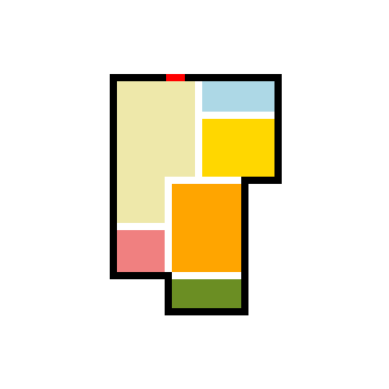

In [11]:
BASE: str = 'dataset/' 
image_path: str = os.path.join(BASE, df['Image_Path'][0])
image = Image.open(image_path)
plt.imshow(image)
plt.axis('off')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

# loading bert embeddings
X_text_embeddings = np.array(df['BERT_Embeddings'].tolist()) 
image_paths = df['Image_Path'].tolist()

# load images
X_images = [] 
for path in image_paths: 
    path = os.path.join(BASE, path)
    image = Image.open(path)
    image_array = np.array(image) / 255.0
    X_images.append(image_array)
    
# convert to numpy array
X_text_embeddings = np.array(X_text_embeddings)
X_images = np.array(X_images)

# print the shape of the arrays
print(X_text_embeddings.shape)
print(X_images.shape)

(4003, 1, 768)
(4003, 256, 256, 3)


In [13]:
# prepare labels 
y = np.arange(len(df)) 
X_train_text, X_test_text, X_train_images, X_test_images, y_train, y_test = train_test_split(X_text_embeddings, X_images, y, test_size=0.2, random_state=42)

# print the shape of the arrays
print(X_train_text.shape)
print(X_train_images.shape)
print(y_train.shape)
print(X_test_text.shape)
print(X_test_images.shape)
print(y_test.shape)


(3202, 1, 768)
(3202, 256, 256, 3)
(3202,)
(801, 1, 768)
(801, 256, 256, 3)
(801,)


In [14]:
# reshape to remove extra dimension 
X_train_text = X_train_text.reshape(X_train_text.shape[0], -1)
print(X_train_text.shape)

(3202, 768)


In [15]:
X_test_text = X_test_text.reshape(X_test_text.shape[0], -1)
print(X_test_text.shape)

(801, 768)


In [16]:
print("X_train_text shape:", X_train_text.shape)
print("X_train_images shape:", X_train_images.shape)

print("X_test_text shape:", X_test_text.shape)
print("X_test_images shape:", X_test_images.shape)

X_train_text shape: (3202, 768)
X_train_images shape: (3202, 256, 256, 3)
X_test_text shape: (801, 768)
X_test_images shape: (801, 256, 256, 3)


In [17]:
X_train_text[0]

array([-0.5754481 ,  0.0189473 ,  0.11817609,  0.02992155,  0.65141094,
       -0.20927459,  0.04845341,  0.5410135 ,  0.13207452, -0.63569915,
        0.207006  , -0.64307034, -0.38915625,  0.16688353, -0.30772436,
        0.46441597,  0.28175345,  0.20655034,  0.0714353 ,  0.34022012,
        0.05433815, -0.29941747, -0.17494744,  0.60304934,  0.12055178,
       -0.01095621, -0.02932324,  0.07023944, -0.19566831,  0.08874706,
        0.6439936 , -0.04744988, -0.00477395, -0.67380816,  0.15863612,
       -0.2338918 ,  0.19983698, -0.14235647, -0.5475427 ,  0.14933665,
       -0.7797225 , -0.18704425,  0.05365221,  0.08347022, -0.0300341 ,
       -0.18644734,  0.5152984 , -0.21001706, -0.21902874,  0.3655471 ,
       -0.48608094, -0.05752416, -0.14547814,  0.0989761 ,  0.33760992,
        0.8571075 , -0.378471  , -0.23348029, -0.4961075 , -0.46169376,
        0.4204655 , -0.18531236,  0.44366038, -0.50126475,  0.26569808,
       -0.03627625,  0.44500747,  0.5008911 , -0.41431153,  0.07

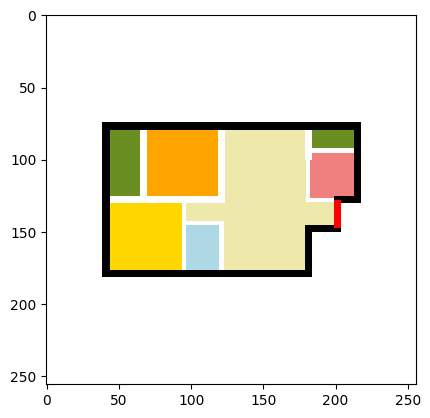

In [18]:
# display images 
data = X_train_images[2] 
plt.imshow(data, interpolation='nearest')
plt.show()

In [28]:
import torch 
import torch.nn as nn 

class Generator(nn.Module):
    def __init__(self, embedding_dim, image_channels=3):
        super(Generator, self).__init__()
        self.embedding_dim = embedding_dim
        self.fc = nn.Linear(embedding_dim, 256*256*3)
        self.conv_blocks = nn.Sequential(
            nn.Conv2d(105, 64, 3, stride=1, padding=1),  # Adjusted input channels to 105
            nn.BatchNorm2d(64),
            nn.ReLU(),
            # Add more layers as needed
        )

    def forward(self, noise, text_embeddings):
        noise = noise.unsqueeze(2).unsqueeze(3)  # Add spatial dimensions
        noise = noise.repeat(1, 1, 256, 256)  # Repeat noise to match image size
        
        text_embeddings = text_embeddings.unsqueeze(2).unsqueeze(3)  # Add spatial dimensions
        text_embeddings = text_embeddings.repeat(1, 1, 256, 256)  # Repeat embeddings to match image size
        
        x = torch.cat([noise, text_embeddings], dim=1)  # Concatenate along channel dimension
        x = self.conv_blocks(x)
        return x
    

In [29]:
class Discriminator(nn.Module): 
    def __init__(self, image_channels=3, embedding_dim=768): 
        super(Discriminator, self).__init__() 
        self.conv_blocks = nn.Sequential(
            nn.Conv2d(image_channels + 3, 64, kernel_size=3, stride=2, padding=1), 
            nn.LeakyReLU(0.2, inplace=True),  
        )
        self.fc = nn.Linear(64*128*128, 1)
    
    def forward(self, images, text_embeddings): 
        x = torch.cat([images, text_embeddings.view(text_embeddings.size(0), text_embeddings.size(1), 1, 1)], dim=1)
        x = self.conv_blocks(x)
        x = x.view(x.size(0), -1)
        validity = self.fc(x)
        return validity

In [30]:
from torch.utils.data import Dataset 

class CustomDataset(Dataset): 
    def __init__(self, real_images, text_embeddings): 
        self.real_images = real_images
        self.text_embeddings = text_embeddings
        
    def __len__(self): 
        return len(self.real_images)
    
    def __getitem__(self, index):
        image = torch.tensor(self.real_images[index], dtype=torch.float32) 
        embedding = torch.tensor(self.text_embeddings[index], dtype=torch.float32)
        return image, embedding
    
real_images = X_train_images[:100]
text_embeddings = X_train_text[:100] 

custom_dataset = CustomDataset(real_images=real_images, text_embeddings=text_embeddings) 

In [31]:
from torch.utils.data import DataLoader

batch_size = 16
num_epochs = 18 

data_loader = DataLoader(dataset=custom_dataset, batch_size=batch_size, shuffle=True)
generator = Generator(embedding_dim=768)
discriminator = Discriminator() 

optimizer_G = torch.optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999)) 
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

In [32]:
for epoch in range(num_epochs): 
    for i, (images, text_embeddings) in enumerate(data_loader): 
        optimizer_D.zero_grad()
        
        noise = torch.randn(batch_size, 100) 
        fake_images = generator(noise, text_embeddings) 
        
        real_loss = discriminator(images, text_embeddings) 
        fake_loss = discriminator(fake_images, text_embeddings)
        
        d_loss = -torch.mean(real_loss) + torch.mean(fake_loss)
        
        d_loss.backward() 
        optimizer_D.step() 
        
        optimizer_G.zero_grad() 
        
        noise = torch.randn(batch_size, 100)
        fake_images = generator(noise, text_embeddings)
        
        g_loss = -torch.mean(discriminator(fake_images, text_embeddings)) 
        g_loss.backward()
        optimizer_G.step()

RuntimeError: Given groups=1, weight of size [64, 105, 3, 3], expected input[16, 868, 256, 256] to have 105 channels, but got 868 channels instead

In [9]:
a = (2,5)
b,c = a
print(b,c)

2 5
